In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


762
610


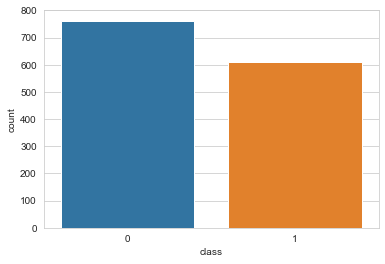

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=data)
print(np.sum(data['class']==0))
print(np.sum(data['class']==1))

as we can see the classes are almost __balanced__ and we shouldn't be worry about it.

mean variance of class 0 : 2.2766860052493447
mean variance of class 1 : -1.868442562786883


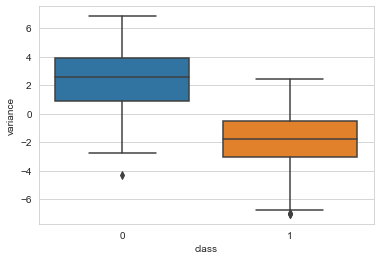

In [8]:
sns.boxplot(x='class',y='variance',data=data)
print('mean variance of class 0 : ' + str(np.mean(data[data['class']==0]['variance'])))
print('mean variance of class 1 : ' + str(np.mean(data[data['class']==1]['variance'])))

this feature is really a nice feature! :D \
we even can seperate the data only by this feature and a single dicision tree with length 1! the result shouldn't be that bad.

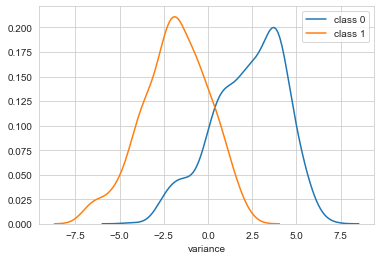

In [9]:
class_0 = data.loc[data['class'] == 0]
class_1 = data.loc[data['class'] == 1]
sns.distplot(class_0['variance'] , hist = False , label = 'class 0')
sns.distplot(class_1['variance'] , hist = False , label = 'class 1')


mean skewness of class 0 : 4.256627188342784
mean skewness of class 1 : -0.9935761245901634


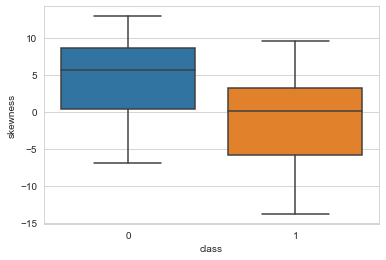

In [10]:
sns.boxplot(x='class',y='skewness',data=data)
print('mean skewness of class 0 : ' + str(np.mean(data[data['class']==0]['skewness'])))
print('mean skewness of class 1 : ' + str(np.mean(data[data['class']==1]['skewness'])))

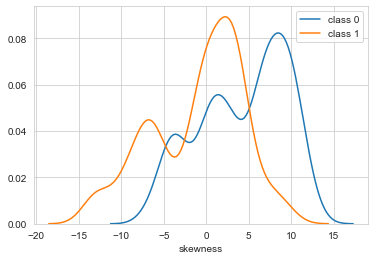

In [11]:
sns.distplot(class_0['skewness'] , hist = False , label = 'class 0')
sns.distplot(class_1['skewness'] , hist = False , label = 'class 1')

mean curtosis of class 0 : 0.7967179652099738
mean curtosis of class 1 : 2.1482710088524617


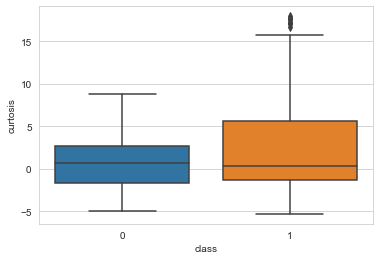

In [12]:
sns.boxplot(x='class',y='curtosis',data=data)
print('mean curtosis of class 0 : ' + str(np.mean(data[data['class']==0]['curtosis'])))
print('mean curtosis of class 1 : ' + str(np.mean(data[data['class']==1]['curtosis'])))

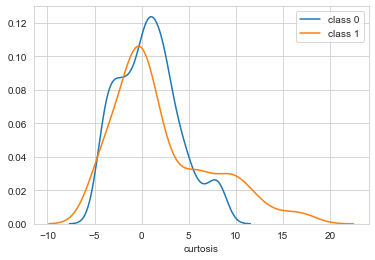

In [13]:
sns.distplot(class_0['curtosis'] , hist = False, label = 'class 0')
sns.distplot(class_1['curtosis'] , hist = False, label = 'class 1')

mean entropy of class 0 : -1.1476402762467195
mean entropy of class 1 : -1.2466407459016389


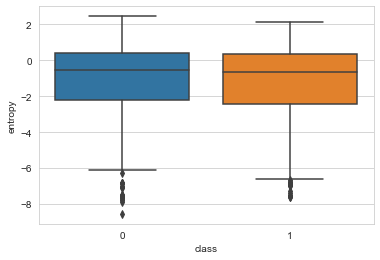

In [14]:
sns.boxplot(x='class',y='entropy',data=data)
print('mean entropy of class 0 : ' + str(np.mean(data[data['class']==0]['entropy'])))
print('mean entropy of class 1 : ' + str(np.mean(data[data['class']==1]['entropy'])))

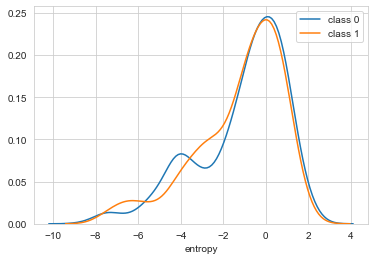

In [15]:
sns.distplot(class_0['entropy'] , hist = False , label = 'class 0')
sns.distplot(class_1['entropy'] , hist = False , label = 'class 1')

In [16]:
columns = data.columns
columns = columns.drop(labels=['class'])

X = data[columns]
y = data['class']

In [17]:
X_v = X.values
y_v = y.values
indices = list(range(X_v.shape[0]))
num_training_indices = int(0.8 * X_v.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training_indices]
test_indices = indices[num_training_indices:]

# split the actual data
X_train, X_test = X_v[train_indices], X_v[test_indices]
y_train, y_test = y_v[train_indices], y_v[test_indices]

In [18]:
def predict(weights, x):
    prod = np.dot(x, weights[1:]) + weights[0]
    if prod > 0:
        predict = 1
    else:
        predict = 0            
    return predict

In [19]:
def train_weights(train, labels, lr_rate, epochs):
    weights = np.zeros(train.shape[1] + 1)
    for _ in range(epochs):
        for row, label in zip(train, labels):
            prediction = predict(weights, row)
            weights[1:] += lr_rate * (label - prediction) * row
            weights[0] += lr_rate * (label - prediction)
    return weights

In [20]:
weights = train_weights(X_train, y_train, 0.001, 200)

In [21]:
def pred_mat(wights, X):
    N = X.shape[0]
    y_pred = np.zeros(N)
    for i in range(N):
        y_pred[i] = predict(weights , X[i,:])
    return y_pred

In [22]:
y_pred_train = pred_mat(weights, X_train)
y_pred_test = pred_mat(weights, X_test)

In [23]:
def confusion(pred, real , string):
    conf_mat = pd.crosstab(real, pred).values
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix' + ' of ' + string , y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    accuracy = (conf_mat[0,0] + conf_mat[1,1])/(conf_mat[0,0] + conf_mat[1,1] + conf_mat[1,0] + conf_mat[0,1])
    recall = (conf_mat[0,0])/(conf_mat[0,0] + conf_mat[0,1])
    precision = (conf_mat[0,0])/(conf_mat[0,0] + conf_mat[1,0])
    fScore = 2*recall*precision/(recall + precision)
    
    print("accuracy of the model is : " + str(accuracy))
    print("recall of the model is : " + str(recall))
    print("precision of the model is : " + str(precision))
    print("F-score of the model is : " + str(fScore))

## results for training data

accuracy of the model is : 0.9854147675478578
recall of the model is : 0.9869067103109657
precision of the model is : 0.9869067103109657
F-score of the model is : 0.9869067103109657


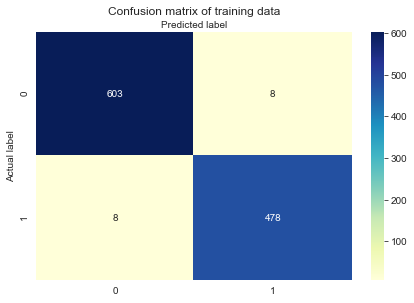

In [24]:
confusion(y_pred_train, y_train, 'training data')

## results for testing data

accuracy of the model is : 0.9854545454545455
recall of the model is : 0.9867549668874173
precision of the model is : 0.9867549668874173
F-score of the model is : 0.9867549668874173


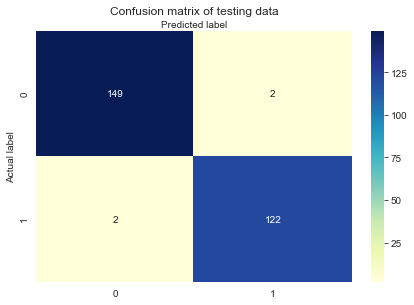

In [25]:
confusion(y_pred_test, y_test, 'testing data')

In [27]:
np.sum(y_pred_test != y_test)

4

we only predicted 4 test data wrong!

In [33]:
X_false = X_test[y_pred_test != y_test]

In [34]:
X_false

array([[ 0.5195, -3.2633,  3.0895, -0.9849],
       [ 0.3292, -4.4552,  4.5718, -0.9888],
       [ 1.7875,  4.78  , -5.1362, -3.2362],
       [ 2.2279,  4.0951, -4.8037, -2.1112]])

In [30]:
print(y_test[y_pred_test != y_test])

[0 0 1 1]


In [32]:
print(y_pred_test[y_pred_test != y_test].astype(int))

[1 1 0 0]


In [38]:
np.dot(X_false, weights[1:]) + weights[0]

array([ 0.06585115,  0.05771607, -0.00879294, -0.07121114])

as we can see they are so close to zero and we predict them wrong.